### HOUSE PRICE PREDICTION

Objective : The objective of this project is to determine the house sale prices in The Ames, Iowa.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
sns.set_style('darkgrid')
pd.set_option("max.columns", 100)
pd.set_option("display.max_rows", 100)

## Load & Clean Data

The dataset is obtained from kaggle website   
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.shape, test.shape

((1460, 81), (1459, 80))

The train dataset has 1460 rows and 81 columns. The test dataset has 1459 rows and 80 columns.

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Datset contains null values

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


## Exploatory Data Analysis (EDA)

### Null Values or Missing Values

In [8]:
train.isnull().sum()[train.isnull().sum() > 0].sort_values(ascending = False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

### Drop the missing Values

In [9]:
train.dropna(axis = 1, inplace = True)

In [10]:
train.shape

(1460, 62)

### Feature Correlation

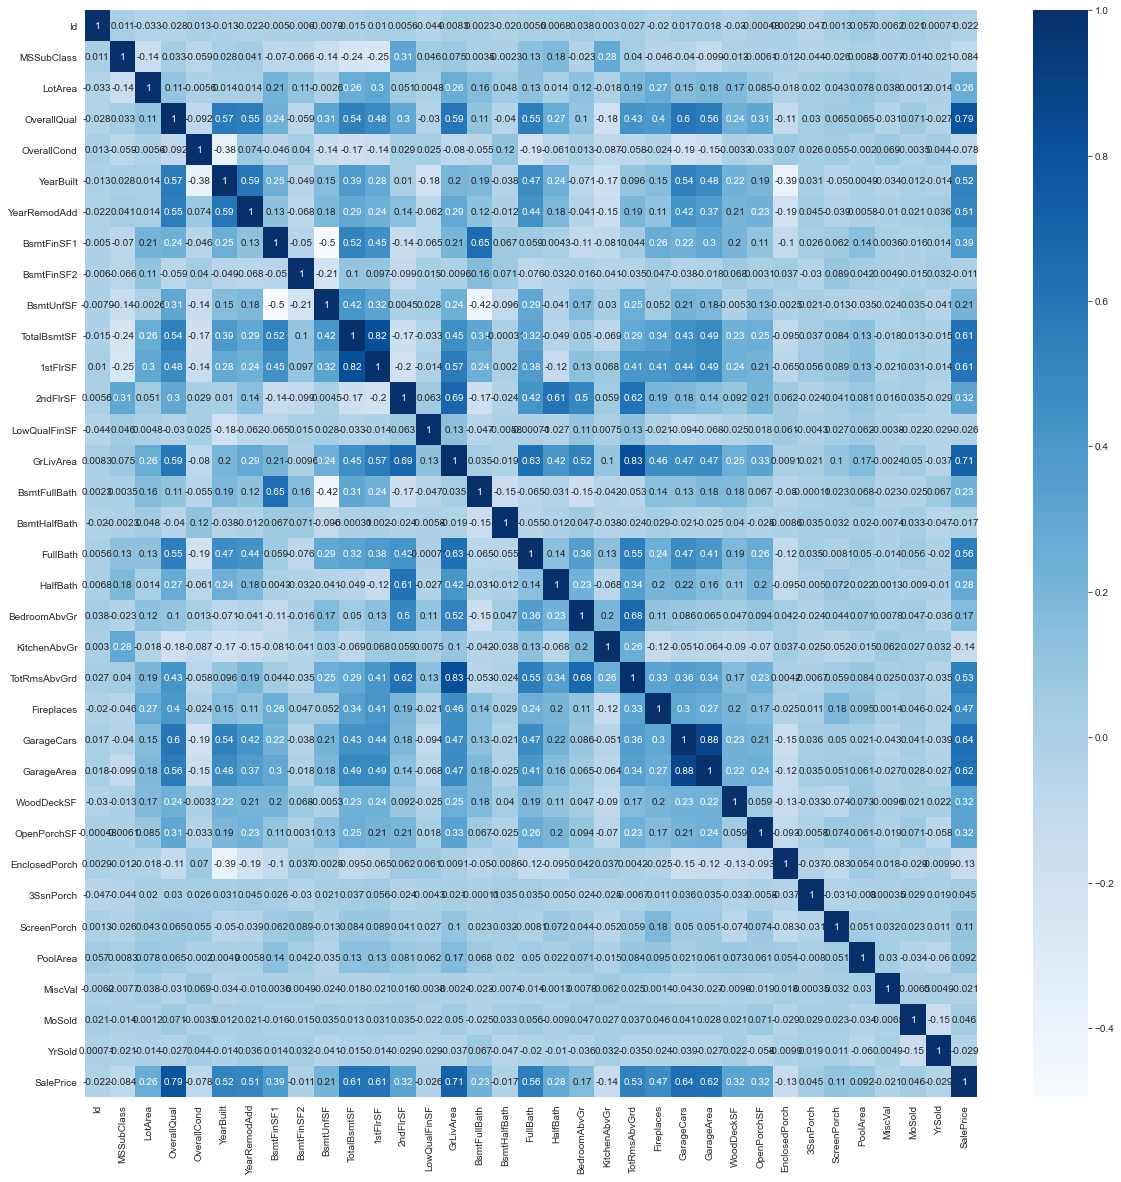

In [48]:
plt.figure(figsize = (20, 20))
sns.heatmap(train.corr(), annot=True, cmap = 'Blues')
plt.show()

In [11]:
train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

<AxesSubplot:>

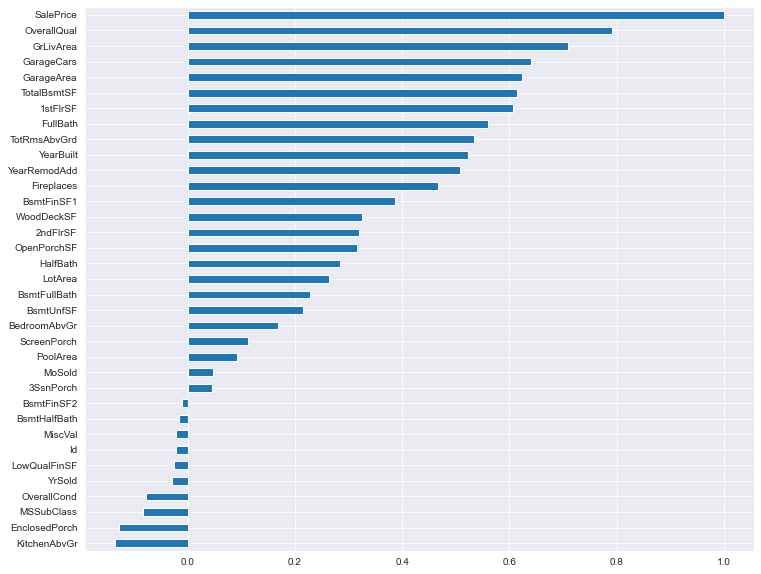

In [12]:
plt.figure(figsize = (12,10))
train.corr()['SalePrice'].sort_values(ascending=True).plot(kind='barh')

In [13]:
corr_feat = train.corr()['SalePrice'][train.corr()['SalePrice'] > 0].sort_values(ascending = False).keys()
print(corr_feat)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'Fireplaces', 'BsmtFinSF1', 'WoodDeckSF', '2ndFlrSF',
       'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF',
       'BedroomAbvGr', 'ScreenPorch', 'PoolArea', 'MoSold', '3SsnPorch'],
      dtype='object')


In [14]:
corrf_train = train.loc[:, corr_feat].copy()
corrf_train.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,Fireplaces,BsmtFinSF1,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,ScreenPorch,PoolArea,MoSold,3SsnPorch
0,208500,7,1710,2,548,856,856,2,8,2003,2003,0,706,0,854,61,1,8450,1,150,3,0,0,2,0
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976,1,978,298,0,0,0,9600,0,284,3,0,0,5,0
2,223500,7,1786,2,608,920,920,2,6,2001,2002,1,486,0,866,42,1,11250,1,434,3,0,0,9,0
3,140000,7,1717,3,642,756,961,1,7,1915,1970,1,216,0,756,35,0,9550,1,540,3,0,0,2,0
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000,1,655,192,1053,84,1,14260,1,490,4,0,0,12,0


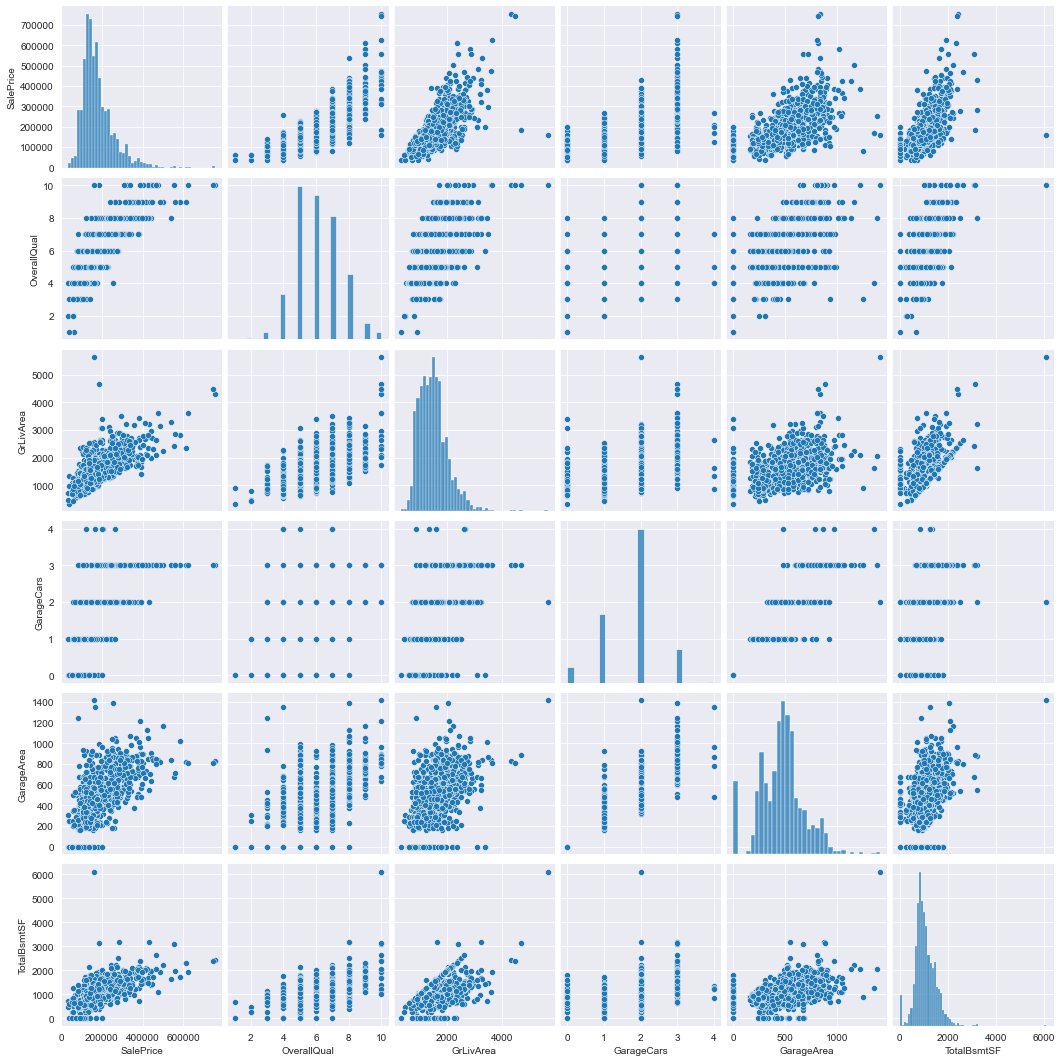

In [15]:
sns.pairplot(corrf_train.iloc[:, :6])

<AxesSubplot:>

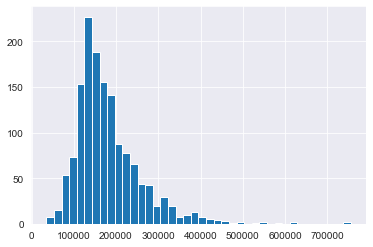

In [16]:
corrf_train['SalePrice'].hist(bins=40)

In [17]:
corrf_train.describe()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,Fireplaces,BsmtFinSF1,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,ScreenPorch,PoolArea,MoSold,3SsnPorch
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,6.099315,1515.463699,1.767123,472.980137,1057.429452,1162.626712,1.565068,6.517808,1971.267808,1984.865753,0.613014,443.639726,94.244521,346.992466,46.660274,0.382877,10516.828082,0.425342,567.240411,2.866438,15.060959,2.758904,6.321918,3.409589
std,79442.502883,1.382997,525.480383,0.747315,213.804841,438.705324,386.587738,0.550916,1.625393,30.202904,20.645407,0.644666,456.098091,125.338794,436.528436,66.256028,0.502885,9981.264932,0.518911,441.866955,0.815778,55.757415,40.177307,2.703626,29.317331
min,34900.000000,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000,0.000000,2.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,129975.000000,5.000000,1129.500000,1.000000,334.500000,795.750000,882.000000,1.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7553.500000,0.000000,223.000000,2.000000,0.000000,0.000000,5.000000,0.000000
50%,163000.000000,6.000000,1464.000000,2.000000,480.000000,991.500000,1087.000000,2.000000,6.000000,1973.000000,1994.000000,1.000000,383.500000,0.000000,0.000000,25.000000,0.000000,9478.500000,0.000000,477.500000,3.000000,0.000000,0.000000,6.000000,0.000000
75%,214000.000000,7.000000,1776.750000,2.000000,576.000000,1298.250000,1391.250000,2.000000,7.000000,2000.000000,2004.000000,1.000000,712.250000,168.000000,728.000000,68.000000,1.000000,11601.500000,1.000000,808.000000,3.000000,0.000000,0.000000,8.000000,0.000000
max,755000.000000,10.000000,5642.000000,4.000000,1418.000000,6110.000000,4692.000000,3.000000,14.000000,2010.000000,2010.000000,3.000000,5644.000000,857.000000,2065.000000,547.000000,2.000000,215245.000000,3.000000,2336.000000,8.000000,480.000000,738.000000,12.000000,508.000000


### Handling Outliers

<AxesSubplot:ylabel='LotArea'>

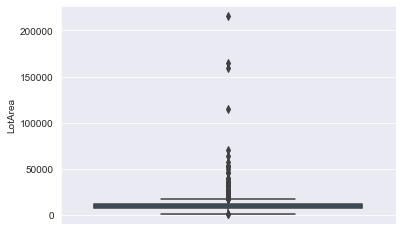

In [38]:
sns.boxplot(y = train['LotArea'])

<AxesSubplot:ylabel='TotRmsAbvGrd'>

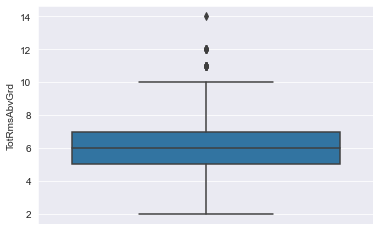

In [37]:
sns.boxplot(y = train['TotRmsAbvGrd'])

<AxesSubplot:ylabel='TotalBsmtSF'>

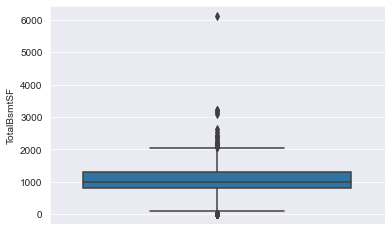

In [36]:
sns.boxplot(y = train['TotalBsmtSF'])

### Distribution of OverallQual - Overall material and finish quality

<AxesSubplot:>

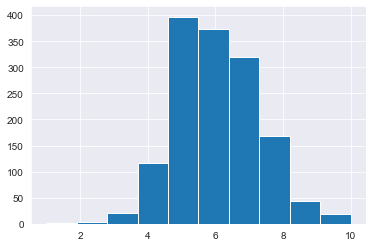

In [18]:
corrf_train['OverallQual'].hist(bins=10)

### Distribution of GrLivArea - living area square feet

<AxesSubplot:>

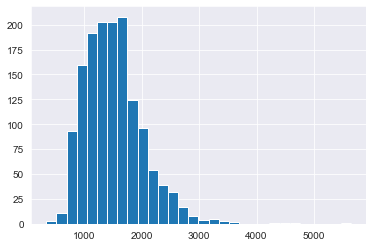

In [19]:
corrf_train['GrLivArea'].hist(bins=30)

### Distribution of BedroomAbvGr - Number of bedrooms above basement level

<AxesSubplot:>

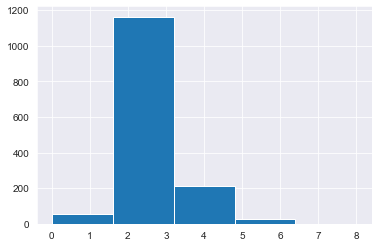

In [20]:
corrf_train['BedroomAbvGr'].hist(bins=5)

### Distribution of TotalBsmtSF - Total square feet of basement area

<AxesSubplot:>

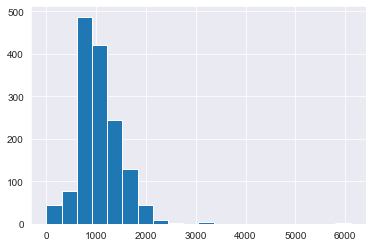

In [21]:
corrf_train['TotalBsmtSF'].hist(bins=20)

### Distribution of GarageCars - Size of garage in car capacity

<AxesSubplot:>

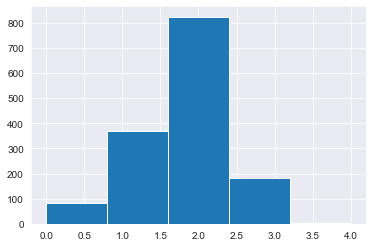

In [22]:
corrf_train['GarageCars'].hist(bins=5)

## Modeling

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [24]:
X = corrf_train.drop('SalePrice', axis=1)
y = corrf_train['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=5)

#### Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

# train
scaler = StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_train = pd.DataFrame(X_scaled, columns=[X_train.columns])

# test
scaler = StandardScaler().fit(X_val)
X_scaled = scaler.transform(X_val)
X_val = pd.DataFrame(X_scaled, columns=[X_val.columns])

In [26]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [27]:
y_train_pred = lr.predict(X_train)
y_val_pred = lr.predict(X_val)

In [28]:
lr_train_r2 = lr.score(X_train, y_train)
lr_val_r2 = lr.score(X_val, y_val)
print("Training R-squared", lr_train_r2)
print("Test R-squared", lr_val_r2)

Training R-squared -239.58964047401574
Test R-squared -276.59833177111574


In [29]:
lr_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
lr_val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print("Training RMSE", lr_train_rmse)
print("Test RMSE", lr_val_rmse)

Training RMSE 1257800.6627329667
Test RMSE 1255114.4852050033


In [30]:
# Importance
importance = lr.coef_

# Features
feature_names = []

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# summarize feature importance
for i,var in enumerate(X_train.columns.values):
    if isinstance(var, tuple):
        feature_names.append(var[0])

Feature: 0, Score: 19175.61869
Feature: 1, Score: 16.90331
Feature: 2, Score: 9258.92805
Feature: 3, Score: 10.48694
Feature: 4, Score: 12.98022
Feature: 5, Score: 30.87694
Feature: 6, Score: -1245.46027
Feature: 7, Score: 4137.16273
Feature: 8, Score: 227.45190
Feature: 9, Score: 283.17032
Feature: 10, Score: 5154.95728
Feature: 11, Score: 12.88606
Feature: 12, Score: 30.76282
Feature: 13, Score: 27.58272
Feature: 14, Score: 1.69829
Feature: 15, Score: -1634.31996
Feature: 16, Score: 0.47869
Feature: 17, Score: 4760.86526
Feature: 18, Score: -0.45757
Feature: 19, Score: -7396.39973
Feature: 20, Score: 60.85569
Feature: 21, Score: -43.64086
Feature: 22, Score: -93.77041
Feature: 23, Score: 34.65674


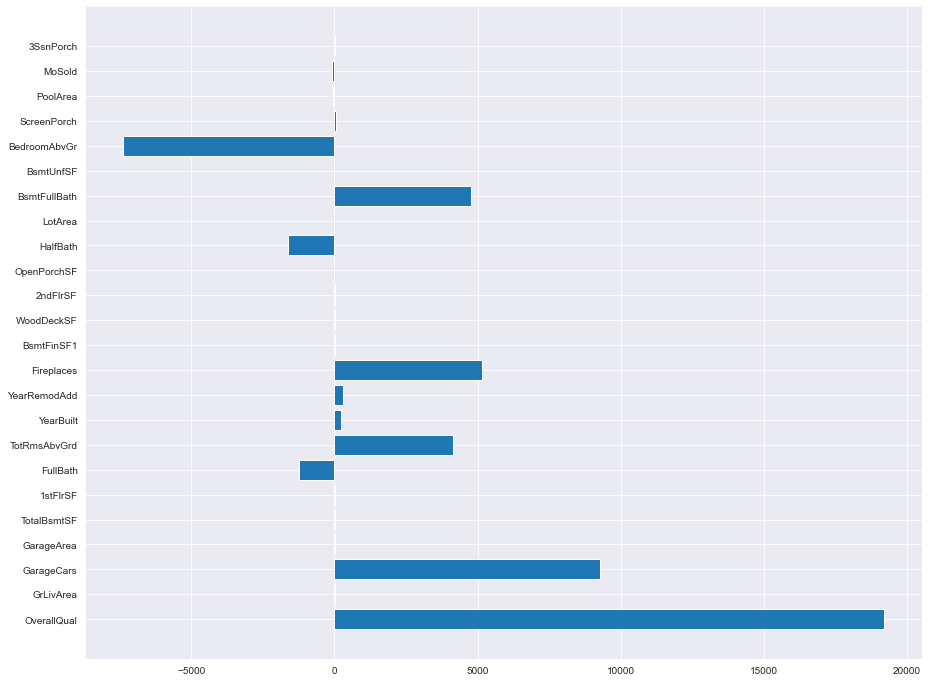

In [31]:
# plot feature importance
plt.figure(figsize = (15, 12))
plt.barh([x for x in range(len(importance))], importance)
plt.yticks(range(len(importance)), feature_names)
plt.show()

## Data fields  
**SalePrice:**  the property’s sale price in dollars. This is the target variable that you’re trying to predict.  
**MSSubClass:** The building class  
**MSZoning:** The general zoning classification  
**LotFrontage:** Linear feet of street connected to property  
**LotArea:** Lot size in square feet  
**Street:** Type of road access  
**Alley:** Type of alley access  
**LotShape:** General shape of property  
**LandContour:** Flatness of the property  
**Utilities:** Type of utilities available  
**LotConfig:** Lot configuration  
**LandSlope:** Slope of property  
**Neighborhood:** Physical locations within Ames city limits  
**Condition1:** Proximity to main road or railroad  
**Condition2:** Proximity to main road or railroad (if a second is present)  
**BldgType:** Type of dwelling  
**HouseStyle:** Style of dwelling  
**OverallQual:** Overall material and finish quality  
**OverallCond:** Overall condition rating  
**YearBuilt:** Original construction date  
**YearRemodAdd:** Remodel date  
**RoofStyle:** Type of roof  
**RoofMatl:** Roof material  
**Exterior1st:** Exterior covering on house  
**Exterior2nd:** Exterior covering on house (if more than one material)  
**MasVnrType:** Masonry veneer type  
**MasVnrArea:** Masonry veneer area in square feet  
**ExterQual:** Exterior material quality  
**ExterCond:** Present condition of the material on the exterior  
**Foundation:** Type of foundation  
**BsmtQual:** Height of the basement  
**BsmtCond:** General condition of the basement  
**BsmtExposure:** Walkout or garden level basement walls  
**BsmtFinType1:** Quality of basement finished area  
**BsmtFinSF1:** Type 1 finished square feet  
**BsmtFinType2:** Quality of second finished area (if present)  
**BsmtFinSF2:** Type 2 finished square feet  
**BsmtUnfSF:** Unfinished square feet of basement area  
**TotalBsmtSF:** Total square feet of basement area  
**Heating:** Type of heating  
**HeatingQC:** Heating quality and condition  
**CentralAir:** Central air conditioning  
**Electrical:** Electrical system  
**1stFlrSF:** First Floor square feet  
**2ndFlrSF:** Second floor square feet  
**LowQualFinSF:** Low quality finished square feet (all floors)  
**GrLivArea:** Above grade (ground) living area square feet  
**BsmtFullBath:** Basement full bathrooms  
**BsmtHalfBath:** Basement half bathrooms  
**FullBath:** Full bathrooms above grade  
**HalfBath:** Half baths above grade  
**Bedroom:** Number of bedrooms above basement level  
**Kitchen:** Number of kitchens  
**KitchenQual:** Kitchen quality  
**TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)  
**Functional:** Home functionality rating  
**Fireplaces:** Number of fireplaces  
**FireplaceQu:** Fireplace quality  
**GarageType:** Garage location  
**GarageYrBlt:** Year garage was built  
**GarageFinish:** Interior finish of the garage  
**GarageCars:** Size of garage in car capacity  
**GarageArea:** Size of garage in square feet  
**GarageQual:** Garage quality  
**GarageCond:** Garage condition  
**PavedDrive:** Paved driveway  
**WoodDeckSF:** Wood deck area in square feet  
**OpenPorchSF:** Open porch area in square feet  
**EnclosedPorch:** Enclosed porch area in square feet  
**3SsnPorch:** Three season porch area in square feet  
**ScreenPorch:** Screen porch area in square feet  
**PoolArea:** Pool area in square feet  
**PoolQC:** Pool quality  
**Fence:** Fence quality  
**MiscFeature:** Miscellaneous feature not covered in other categories  
**MiscVal:** $Value of miscellaneous feature  
**MoSold:** Month Sold  
**YrSold:** Year Sold  
**SaleType:** Type of sale  
**SaleCondition:** Condition of sale  